## The Dataset contains historical sales data for 45 Amazon stores 

## Cleaning The Data - 

## I have removed all the duplicate or irrelevant columns to the questions below.

In [3]:
filelocation = 'amazon_sales_dataset.csv'

with open(filelocation, 'r') as file:
    lines = file.readlines()

header = lines[0]

rows = lines[1:]

uniquerows = set()

filteredrows = [header]  
for row in rows:
    if row not in uniquerows:
        uniquerows.add(row)
        filteredrows.append(row)

with open('filtered_dataset.csv', 'w') as file:
    for row in filteredrows:
        file.write(row)

print("All duplicate rows have been removed and the new dataset has been saved as 'filtered_dataset.csv'")


All duplicate rows have been removed and the new dataset has been saved as 'filtered_dataset.csv'


## Question 1 - What holiday generally does the stores experience high sales?

The period with the highest sales occurred in November, 2019, with sales amounting to: £39842434.17


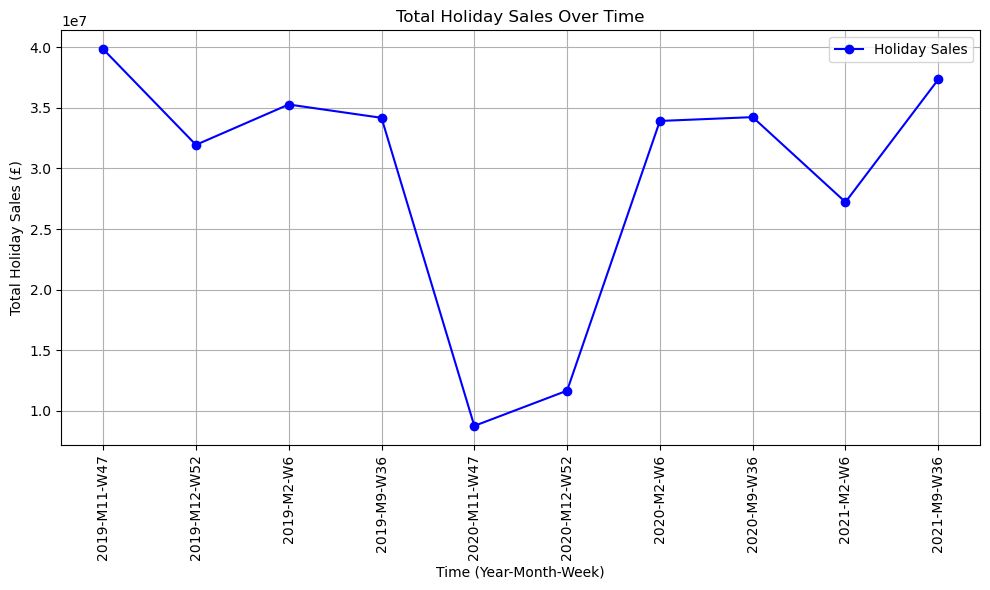

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually loading the CSV file (same approach as before)
filelocation = 'filtered_dataset.csv'

with open(filelocation, 'r') as file:
    lines = file.readlines()

# Extracting the header and rows from the file
header = lines[0].strip().split(',')
rows = [line.strip().split(',') for line in lines[1:]]

# Identifying the indexes for the relevant columns
yearidx = header.index('Year')
monthidx = header.index('Month')
weekidx = header.index('Week')
isholidayidx = header.index('IsHoliday')
weeklysalesidx = header.index('Weekly_Sales')

# Filtering rows where 'IsHoliday' is '1' (only holiday sales)
holidaysales = [
    row for row in rows if row[isholidayidx] == '1'
]

# Initialising a dictionary to store total sales by (Year, Month, Week)
salesbyyearmonthweek = {}

for row in holidaysales:
    year = row[yearidx]
    month = row[monthidx]
    week = row[weekidx]
    weeklysales = float(row[weeklysalesidx])
    
    # Using (year, month, week) as the key to aggregate sales
    key = (year, month, week)
    
    if key not in salesbyyearmonthweek:
        salesbyyearmonthweek[key] = 0
    
    # Summing up the weekly sales for each period
    salesbyyearmonthweek[key] += weeklysales

# Finding the period with the highest sales
highestsalesperiod = max(salesbyyearmonthweek, key=salesbyyearmonthweek.get)
highestsalesvalue = salesbyyearmonthweek[highestsalesperiod]

# Months list to map month numbers to their names
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

year, month, week = highestsalesperiod
monthname = months[int(month) - 1]  

# Outputting the period with the highest sales (keeping this the same)
print(f"The period with the highest sales occurred in {monthname}, {year}, with sales amounting to: £{highestsalesvalue:.2f}")

# -------- Creating the graph using pandas and matplotlib --------

# Converting the sales dictionary into a pandas DataFrame for easier plotting
sales_df = pd.DataFrame(list(salesbyyearmonthweek.items()), columns=['Year_Month_Week', 'Total_Sales'])

# Splitting the tuple (Year, Month, Week) into separate columns
sales_df[['Year', 'Month', 'Week']] = pd.DataFrame(sales_df['Year_Month_Week'].tolist(), index=sales_df.index)

# Sorting the DataFrame by Year, Month, and Week to ensure time order
sales_df = sales_df.sort_values(by=['Year', 'Month', 'Week'])

# Creating a new 'Time' column to combine Year, Month, and Week for the x-axis
sales_df['Time'] = sales_df['Year'] + '-M' + sales_df['Month'] + '-W' + sales_df['Week']

# Plotting the total holiday sales over time
plt.figure(figsize=(10, 6))
plt.plot(sales_df['Time'], sales_df['Total_Sales'], marker='o', color='b', label='Holiday Sales')

# Adding labels, title, and formatting the graph
plt.xticks(rotation=90)
plt.xlabel('Time (Year-Month-Week)')
plt.ylabel('Total Holiday Sales (£)')
plt.title('Total Holiday Sales Over Time')
plt.grid(True)
plt.tight_layout()
plt.legend()

# Displaying the graph
plt.show()


## Question 2 - Comparing the Holiday and non-holiday seasons, which season generally does better in sales?

Total sales during Non-Holiday season: £4,592,798,600.28
Total sales during Holiday season: £294,377,011.79
The non-holiday season generally has higher sales.


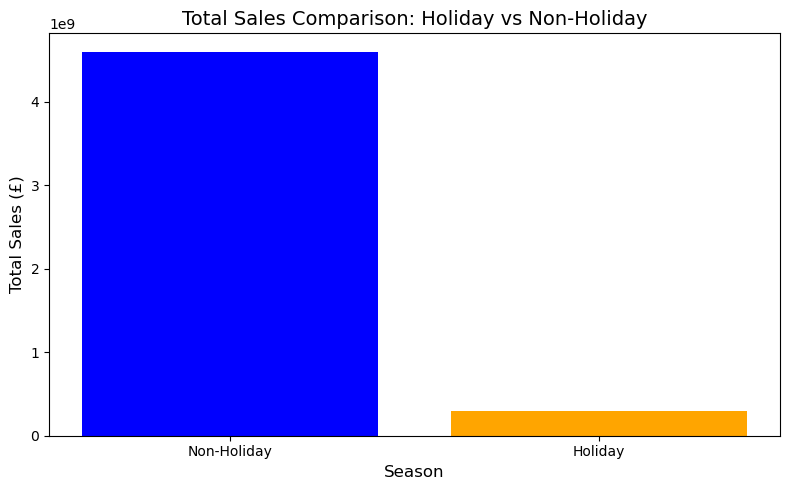

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the CSV file using pandas for easy manipulation
filelocation = 'filtered_dataset.csv'
df = pd.read_csv(filelocation)

# Finding the indexes for 'IsHoliday' and 'Weekly_Sales'
isHolidayIdx = df.columns.get_loc('IsHoliday')
weeklySalesIdx = df.columns.get_loc('Weekly_Sales')

# Initialising a dictionary to keep track of total sales for holiday and non-holiday periods
salesBySeason = {0: 0, 1: 0}

# Iterating through each row of the dataset using .iloc for positional indexing
for i, row in df.iterrows():
    isHoliday = int(row.iloc[isHolidayIdx])  # Use .iloc for positional access
    weeklySales = float(row.iloc[weeklySalesIdx])  # Use .iloc for positional access
    
    # Adding sales to either holiday or non-holiday totals
    if isHoliday in salesBySeason:
        salesBySeason[isHoliday] += weeklySales

# Printing total sales for holiday and non-holiday seasons
for isHoliday, totalSales in salesBySeason.items():
    season = 'Holiday' if isHoliday == 1 else 'Non-Holiday'
    print(f"Total sales during {season} season: £{totalSales:,.2f}")

# Assigning sales totals to variables for comparison
nonHolidaySales = salesBySeason[0]
holidaySales = salesBySeason[1]

# Comparing the sales between non-holiday and holiday periods
if nonHolidaySales > holidaySales:
    print("The non-holiday season generally has higher sales.")
else:
    print("The holiday season generally has higher sales.")

# ---------- Adding a graph to visualise the results ----------

# Creating a simple DataFrame for the total sales by season
sales_df = pd.DataFrame({
    'Season': ['Non-Holiday', 'Holiday'],
    'Total Sales': [nonHolidaySales, holidaySales]
})

# Plotting the total sales comparison using a bar chart
plt.figure(figsize=(8, 5))
plt.bar(sales_df['Season'], sales_df['Total Sales'], color=['blue', 'orange'])

# Adding labels and title to the graph
plt.title('Total Sales Comparison: Holiday vs Non-Holiday', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)

# Making sure the layout is neat
plt.tight_layout()

# Displaying the graph
plt.show()


## Question 3 - Which store has the highest sales so far? 

The period with the highest sales occurred in November, 2019, with sales amounting to: £39842434.17


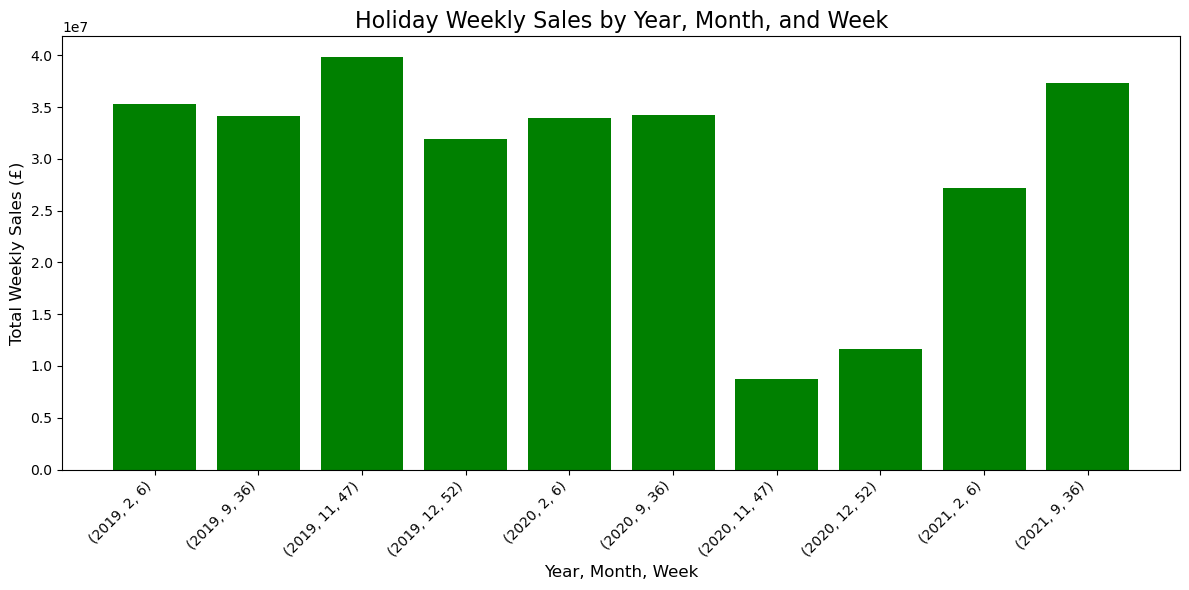

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame for easier data handling
filelocation = 'filtered_dataset.csv'

# Using pandas to read the CSV file
df = pd.read_csv(filelocation)

# Extracting the necessary columns using pandas
yearIdx = df.columns.get_loc('Year')
monthIdx = df.columns.get_loc('Month')
weekIdx = df.columns.get_loc('Week')
isHolidayIdx = df.columns.get_loc('IsHoliday')
weeklySalesIdx = df.columns.get_loc('Weekly_Sales')

# Filtering the DataFrame for holiday sales
holidaySales = df[df['IsHoliday'] == 1]

# Initialising a dictionary to store sales data by (Year, Month, Week)
salesData = {}
for _, row in holidaySales.iterrows():
    year = row.iloc[yearIdx]
    month = row.iloc[monthIdx]
    week = row.iloc[weekIdx]
    weeklySales = float(row.iloc[weeklySalesIdx])
    
    key = (year, month, week)
    
    # Adding sales to the corresponding year, month, week key
    if key not in salesData:
        salesData[key] = 0
    salesData[key] += weeklySales

# Finding the highest sales period
highestSalesPeriod = max(salesData, key=salesData.get)
highestSalesValue = salesData[highestSalesPeriod]

# Creating a list of month names for display
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

year, month, week = highestSalesPeriod
monthName = months[int(month) - 1]  

# Printing out the period with the highest sales
print(f"The period with the highest sales occurred in {monthName}, {year}, with sales amounting to: £{highestSalesValue:.2f}")

# ---------- Now, let's create a graph to visualize the sales data ----------

# Preparing the data for plotting
sales_summary = pd.DataFrame(list(salesData.items()), columns=['Period', 'Weekly_Sales'])
sales_summary[['Year', 'Month', 'Week']] = pd.DataFrame(sales_summary['Period'].tolist(), index=sales_summary.index)

# Plotting the total sales for each (Year, Month, Week) period
plt.figure(figsize=(12, 6))
plt.bar(sales_summary['Period'].astype(str), sales_summary['Weekly_Sales'], color='green')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.title('Holiday Weekly Sales by Year, Month, and Week', fontsize=16)
plt.xlabel('Year, Month, Week', fontsize=12)
plt.ylabel('Total Weekly Sales (£)', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


## 	Question 4 - What year did each store experience the most sales?

Store | Year | TotalSales
1 | 2020 | £55090393.70
9 | 2020 | £24049626.84
8 | 2020 | £45458358.82
4 | 2020 | £61717893.42
5 | 2020 | £16302556.76
14 | 2020 | £56690184.75
6 | 2020 | £61810500.00
3 | 2020 | £15145811.55
20 | 2019 | £58389072.45
19 | 2019 | £54482347.32
18 | 2019 | £50029601.02
42 | 2020 | £25438649.28
13 | 2019 | £57286722.18
10 | 2019 | £60181541.24
11 | 2020 | £57652712.47
16 | 2020 | £25887257.54
17 | 2019 | £39562984.29
15 | 2020 | £31016132.42
44 | 2020 | £15498541.35
45 | 2020 | £39570054.15
43 | 2020 | £26528579.46
22 | 2019 | £47726759.68
21 | 2020 | £39562687.61
23 | 2020 | £61491362.78
24 | 2019 | £53709909.26
25 | 2019 | £34658600.32
27 | 2019 | £59934055.99
2 | 2019 | £59183348.33
32 | 2020 | £48587827.46
39 | 2020 | £56177882.85
29 | 2020 | £26865470.67
31 | 2020 | £47424659.88
40 | 2020 | £42325622.66
30 | 2020 | £21956357.18
37 | 2020 | £25567046.11
36 | 2019 | £20770502.46
33 | 2020 | £12957867.37
34 | 2020 | £46966624.53
35 | 2019 | £46849732.75
41 | 20

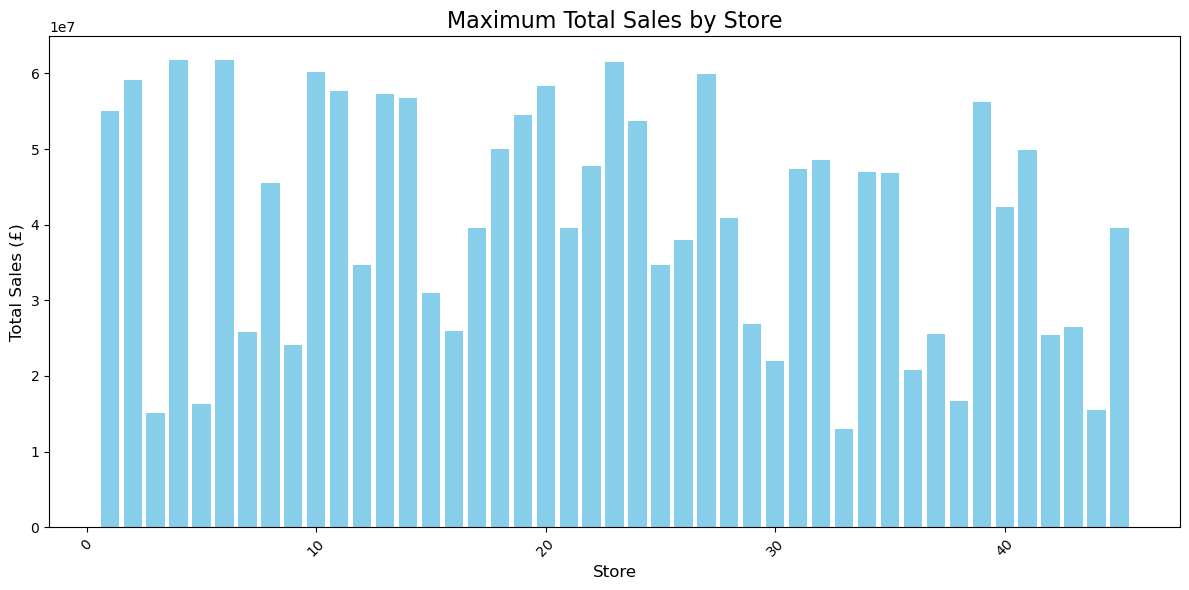

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
filelocation = 'filtered_dataset.csv'

# Using pandas to read the CSV file for easier data handling
df = pd.read_csv(filelocation)

# Extracting the necessary columns using pandas
storeIndex = df.columns.get_loc('Store')
yearIndex = df.columns.get_loc('Year')
weeklySalesIndex = df.columns.get_loc('Weekly_Sales')

# Initialising a nested dictionary to keep track of sales by store and year
salesByStoreYear = {}

# Iterating through each row of the DataFrame
for _, row in df.iterrows():
    store = row.iloc[storeIndex]
    year = row.iloc[yearIndex]
    weeklySales = float(row.iloc[weeklySalesIndex])
    
    # Adding sales data to the dictionary
    if store not in salesByStoreYear:
        salesByStoreYear[store] = {}
    
    if year not in salesByStoreYear[store]:
        salesByStoreYear[store][year] = 0
    
    salesByStoreYear[store][year] += weeklySales

# Finding the maximum sales year for each store
maxSalesByStore = {}

for store, years in salesByStoreYear.items():
    maxYear = max(years, key=years.get)
    maxSalesByStore[store] = (maxYear, years[maxYear])

# Printing the store, year, and total sales
print("Store | Year | TotalSales")
for store, (year, totalSales) in maxSalesByStore.items():
    print(f"{store} | {year} | £{totalSales:.2f}")

# ---------- Adding a graph to visualize the maximum sales by store ----------

# Preparing data for plotting
stores = list(maxSalesByStore.keys())
maxSales = [sales[1] for sales in maxSalesByStore.values()]
years = [sales[0] for sales in maxSalesByStore.values()]

# Creating a bar plot
plt.figure(figsize=(12, 6))
plt.bar(stores, maxSales, color='skyblue')

# Adding labels and title to the graph
plt.title('Maximum Total Sales by Store', fontsize=16)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Displaying the graph
plt.show()


## Question 5 -Analyse the unemployment rate and customer price

Average Unemployment Rate: 7.70%
Average Customer Price: £173.42
If the unemployment rate INCREASES, then the Customer Price DECREASES


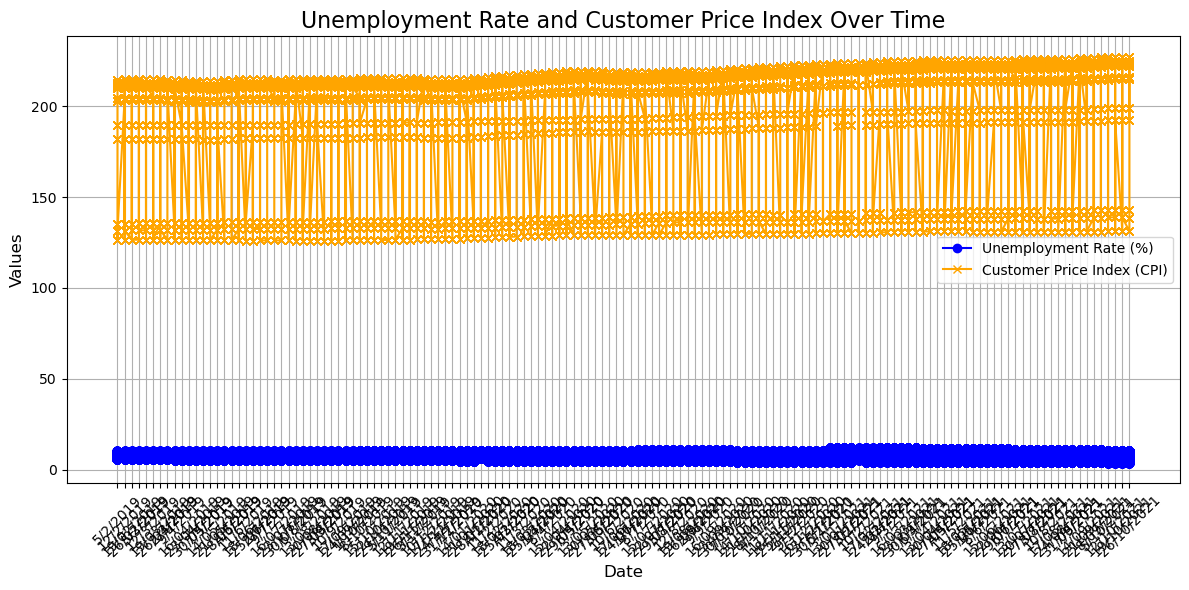

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame for easier data handling
filelocation = 'filtered_dataset.csv'

# Reading the CSV file using pandas
df = pd.read_csv(filelocation)

# Extracting indices of necessary columns
dateIndex = df.columns.get_loc('Date')
unemploymentRateIndex = df.columns.get_loc('Unemployment')
customerPriceIndex = df.columns.get_loc('CPI')

# Initialising lists to store data
dates = df.iloc[:, dateIndex].tolist()
unemploymentRates = df.iloc[:, unemploymentRateIndex].tolist()
customerPrices = df.iloc[:, customerPriceIndex].tolist()

# Calculating averages
avgUnemploymentRate = sum(unemploymentRates) / len(unemploymentRates)
avgCustomerPrice = sum(customerPrices) / len(customerPrices)

# Function to calculate trend
def calculateTrend(data):
    if len(data) < 2:
        return 0
    return (data[-1] - data[0]) / len(data)

# Calculating trends for unemployment rates and customer prices
unemploymentTrend = calculateTrend(unemploymentRates)
priceTrend = calculateTrend(customerPrices)

# Printing average values and trends
print(f"Average Unemployment Rate: {avgUnemploymentRate:.2f}%")
print(f"Average Customer Price: £{avgCustomerPrice:.2f}")
print(f"If the unemployment rate {'INCREASES' if unemploymentTrend > 0 else 'DECREASES' if unemploymentTrend < 0 else 'STAYS STABLE'}, "
      f"then the Customer Price {'INCREASES' if priceTrend > 0 else 'DECREASES' if priceTrend < 0 else 'STAYS STABLE'}")

# ---------- Now let's create a graph to visualise the trends ----------

# Creating a single graph
plt.figure(figsize=(12, 6))

# Plotting the unemployment rate
plt.plot(dates, unemploymentRates, label='Unemployment Rate (%)', color='blue', marker='o')
# Plotting the customer price index (CPI)
plt.plot(dates, customerPrices, label='Customer Price Index (CPI)', color='orange', marker='x')

# Adding titles and labels
plt.title('Unemployment Rate and Customer Price Index Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()
